In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_utils 
import mnist_vae_lib

import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Load data

In [2]:
data_dir = '../mnist_data/'
propn_sample = 1.0

In [3]:
train_set, test_set = mnist_data_utils.get_mnist_dataset(data_dir, propn_sample)

In [4]:
batchsize = 12

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [5]:
for batch_idx, d in enumerate(train_loader):
    data_train = d
    break
    
for batch_idx, d in enumerate(test_loader):
    data_test = d
    break

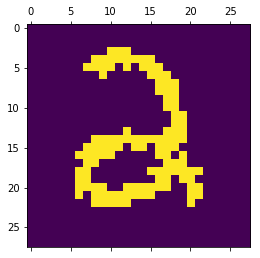

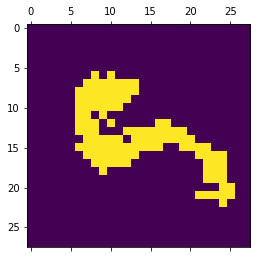

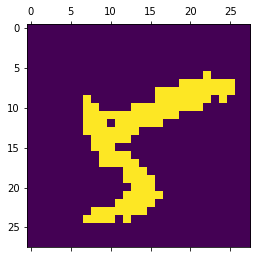

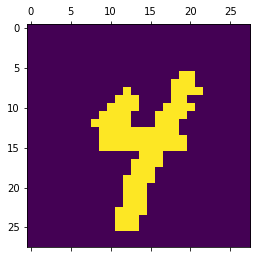

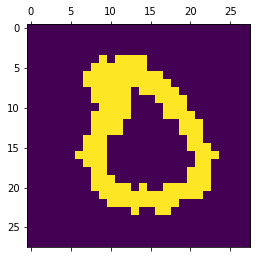

In [6]:
for i in range(5): 
    plt.matshow(data_train['image'][i, :, :])

# Define VAE

In [8]:
vae = mnist_vae_lib.HandwritingVAE()

In [9]:
vae_file = '../mnist_vae_results/mnist_vae_final'

vae.load_state_dict(torch.load(vae_file,
                               map_location=lambda storage, loc: storage))

vae.eval()

HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=10, bias=True)
    (tanh): Tanh()
  )
  (decoder): MLPDecoder(
    (fc1): Linear(in_features=5, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=784, bias=True)
    (sigmoid): Sigmoid()
    (tanh): Tanh()
  )
)

In [10]:
recon_means = vae.forward(data_train['image'])[0]

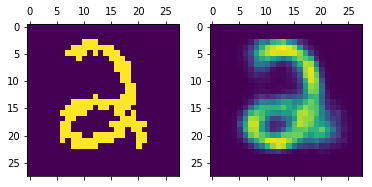

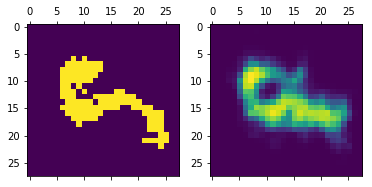

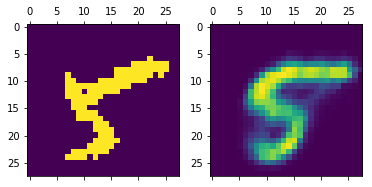

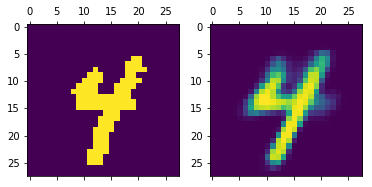

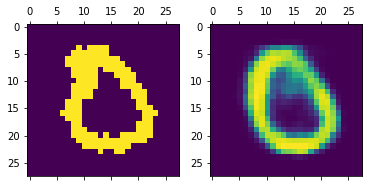

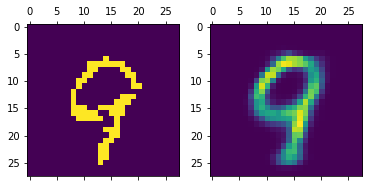

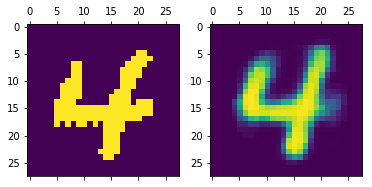

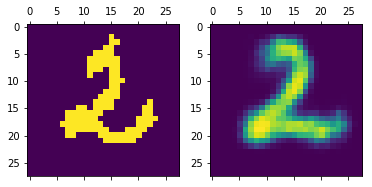

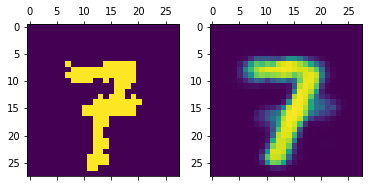

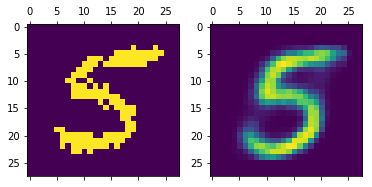

In [11]:
# Check reconstructions 

for i in range(0, 10): 
    
    _, axarr = plt.subplots(1, 2, figsize=(6, 6))
    
    axarr[0].matshow(data_train['image'][i, :, :])
    axarr[1].matshow(recon_means[i, :, :].detach())